Task Image:
Dataset Link:
RGB Dataset can be found at " /data/rgb-images/ " in the respective challenge's repo.
DICOM Dataset can be found at " /data/dicom-images/ " in the respective challenge's repo.

Description:
Images are needed to be preprocessed before feeding them into computer vision algorithms. Comman forms of image data are: 2D, RGB, dicom format, satellite images and 4D images. 2D images are grayscale images, RGB images are 3-channeled images representing color value of pixel, DICOM format is the standard for the communication and management of medical imaging information and related data, and 4D images (example - brain MRI scans) are slices of 3D images stacked on top of each other.

Objective:
How to load and process various formats of image for machine learning (Check out helpful links section to get hints)
<br>
<a href="http://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/"><button>Link 1</button></a>
<hr>

In [1]:
#importing the libraries

import os
import numpy as np
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
#installing the library
!pip install pydicom

In [3]:
#read the rgb images and the store the numerical representation in array.
rgb_path = "data/rgb_images/"
rgb_images = []
rgb_images_path = []
for img_file in os.listdir(rgb_path):
    try:
        p = os.path.join(rgb_path, img_file)
        rgb_images_path.append(p)
        img = mpimg.imread(p)
        if(img is not None):
            rgb_images.append(img)
    except:
        print("Cannot read file : ", img_file)

In [4]:
print("Total number of images : ", len(os.listdir(rgb_path)))
print("Type of the images : ", type(rgb_images[0]))

Total number of images :  23
Type of the images :  <class 'numpy.ndarray'>


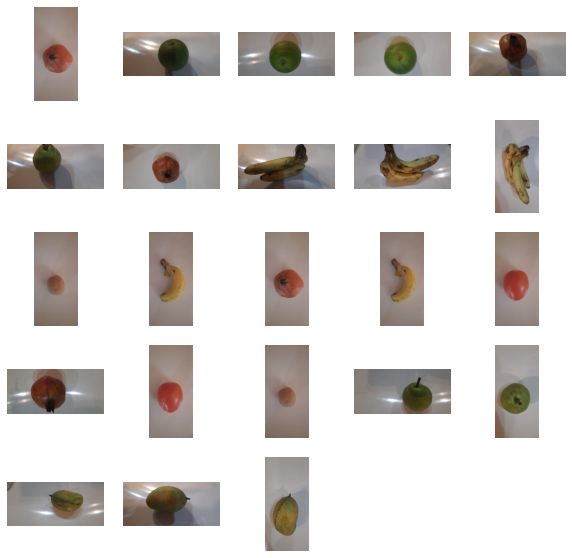

In [5]:
#creating subplots and displaying all the images
fig = plt.figure(figsize = (10, 10))
r, c = 5, 5
index = -1
for i in range(1, r * c + 1):
    fig.add_subplot(r, c, i)
    index += 1
    plt.imshow(rgb_images[index])
    plt.axis('off')
    if(index > 21):
        break

In [6]:
#finding the shapes of the images
print("Height of image 9 : {} \nWidth of image 9 : {} \nNo. of Channels in image 9 : {}".format(rgb_images[8].shape[0], rgb_images[8].shape[1], rgb_images[8].shape[2]))
print("\n======================================================================\n")
for i in range(len(os.listdir(rgb_path))):
    print("Dimensions of image ", i + 1, " is : ", rgb_images[i].shape)
    

Height of image 9 : 590 
Width of image 9 : 1280 
No. of Channels in image 9 : 3


Dimensions of image  1  is :  (1280, 590, 3)
Dimensions of image  2  is :  (590, 1280, 3)
Dimensions of image  3  is :  (590, 1280, 3)
Dimensions of image  4  is :  (590, 1280, 3)
Dimensions of image  5  is :  (590, 1280, 3)
Dimensions of image  6  is :  (590, 1280, 3)
Dimensions of image  7  is :  (590, 1280, 3)
Dimensions of image  8  is :  (590, 1280, 3)
Dimensions of image  9  is :  (590, 1280, 3)
Dimensions of image  10  is :  (1280, 590, 3)
Dimensions of image  11  is :  (1280, 590, 3)
Dimensions of image  12  is :  (1280, 590, 3)
Dimensions of image  13  is :  (1280, 590, 3)
Dimensions of image  14  is :  (1280, 590, 3)
Dimensions of image  15  is :  (1280, 590, 3)
Dimensions of image  16  is :  (590, 1280, 3)
Dimensions of image  17  is :  (1280, 590, 3)
Dimensions of image  18  is :  (1280, 590, 3)
Dimensions of image  19  is :  (590, 1280, 3)
Dimensions of image  20  is :  (1280, 590, 3)
Dimens

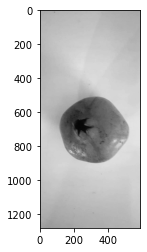

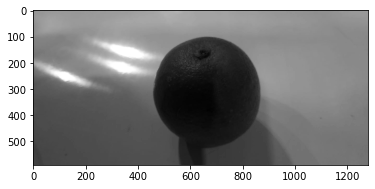

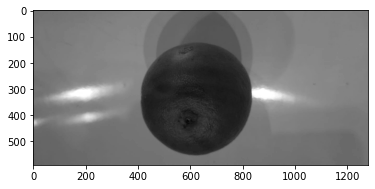

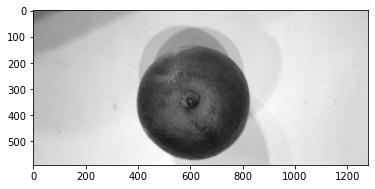

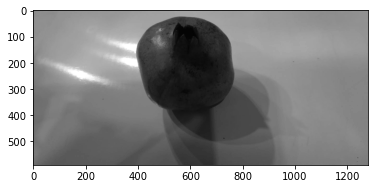

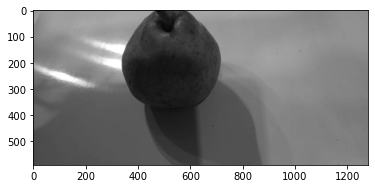

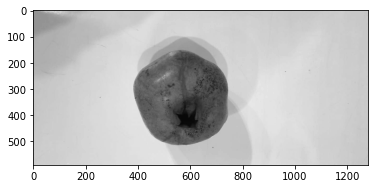

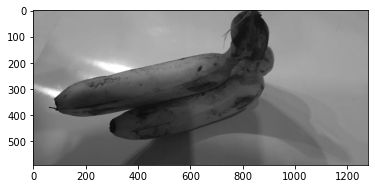

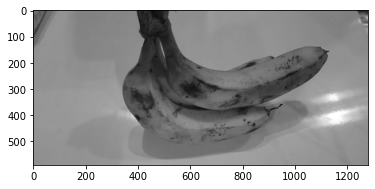

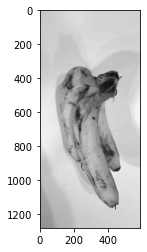

In [7]:
#converting images to grayscale using matplotlib [formula based]

def rgb2gray(rgb):
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

for i in range(10):
    img = rgb2gray(rgb_images[i])
    plt.imshow(img, cmap='gray')
    plt.show()

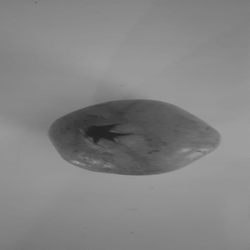

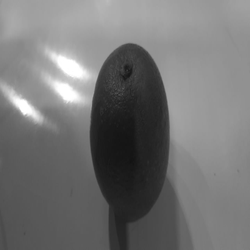

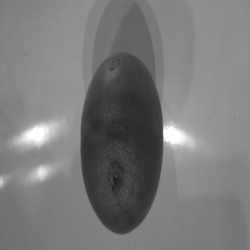

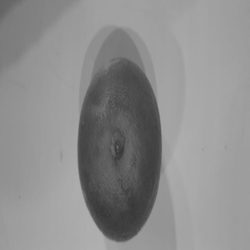

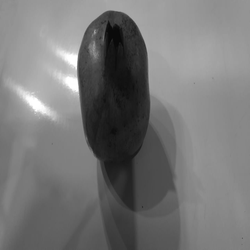

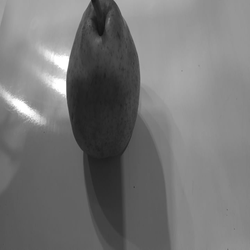

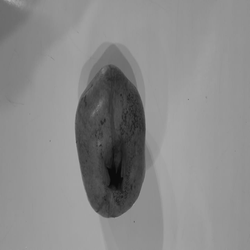

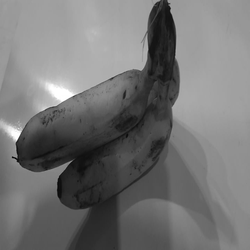

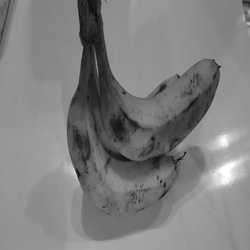

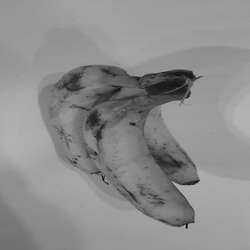

In [8]:
#converting images to grayscale using PIL
from PIL import Image
from IPython.display import display
for i in range(10):
    img = Image.open(rgb_images_path[i]).convert('LA')
    img = img.resize((250, 250), Image.ANTIALIAS)
    #img.show() #shows the image on Photos app in PC
    display(img) #shows the image in the jupyter notebook itself

Type of img :  <class 'numpy.ndarray'>


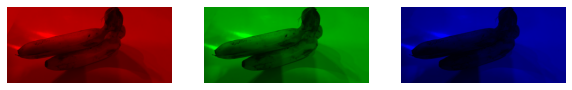

In [9]:
#displaying the image channel wise
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
img = rgb_images[7]
print("Type of img : ", type(img))

for channel, axis in zip(range(3), axes):
    temp_img = np.zeros(img.shape, dtype="uint8")
    temp_img[:, :, channel] = img[:, :, channel]
    axis.imshow(temp_img)
    axis.set_axis_off()

# Working with DICOMS

DICOM(Digital Imaging and COmmunications in Medicine) is the de-facto standard that establishes rules that allow medical images(X-Ray, MRI, CT) and associated information to be exchanged between imaging equipment from different vendors, computers, and hospitals.

DICOM files typically have a .dcm extension and provides a means of storing data in separate 'tags' such as patient information as well as image/pixel data. A DICOM file consists of a header and image data sets packed into a single file. The information within the header is organized as a constant and standardized series of tags.

By extracting data from these tags one can access important information regarding the patient demographics, study parameters, etc

<a href="https://www.kaggle.com/avirdee/understanding-dicoms"><button>Link 1</button></a>

In [10]:
dicom_file = pydicom.dcmread("data/dicom_images/0003.DCM")
print("Meta data in the file : \n")
print(dicom_file)

Meta data in the file : 

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 186
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: X-Ray Angiographic Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.4.3.284980.19951129.170916.9
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.4.3.2
(0002, 0016) Source Application Entity Title     AE: 'SIEMENS:DCR 1.0'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'BIPLANE A']
(0008, 0016) SOP Class UID                       UI: X-Ray Angiographic Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.4.3.284980.19951129.170916.9
(000

In [11]:
#pixel data as raw bytes
#dicom_file.PixelData

In [12]:
#dimension of the dicom file
print("Dicom file shape : ", dicom_file.pixel_array.shape)
print(dicom_file.pixel_array)

Dicom file shape :  (17, 512, 512)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [13]:
dicom_img = dicom_file.pixel_array[5, :, :]
print("Shape : ", dicom_img.shape)
print(dicom_img)

Shape :  (512, 512)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


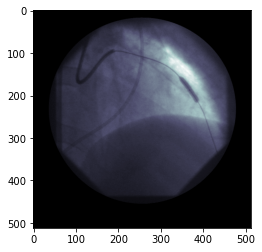

In [14]:
plt.imshow(dicom_img, cmap=plt.cm.bone)

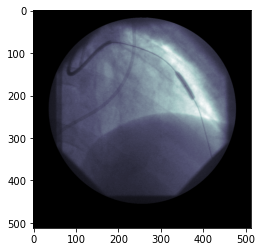

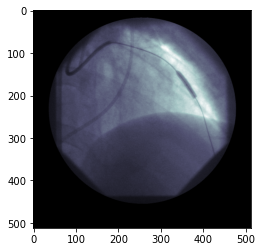

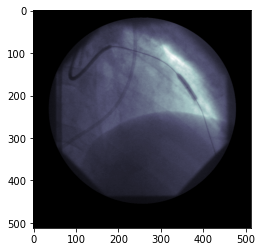

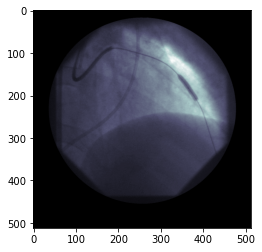

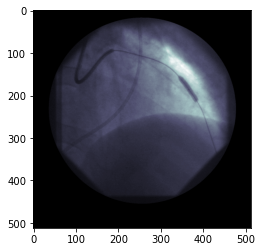

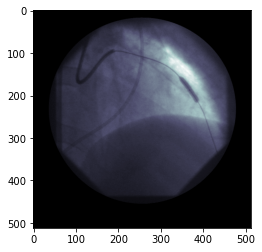

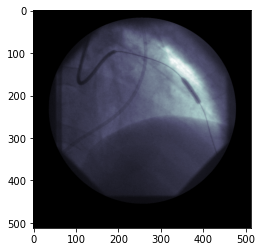

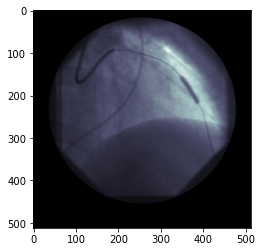

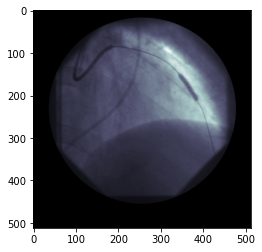

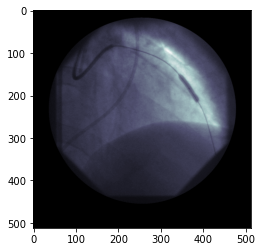

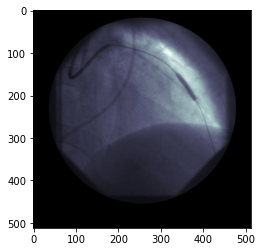

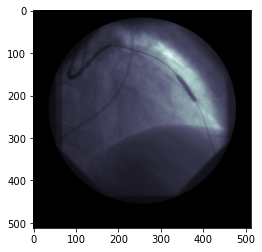

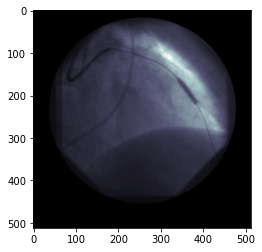

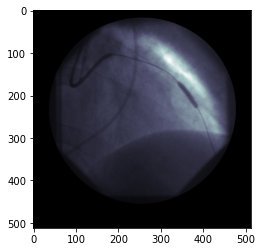

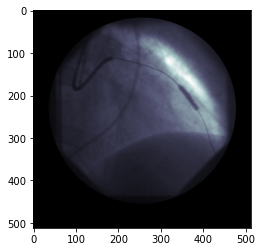

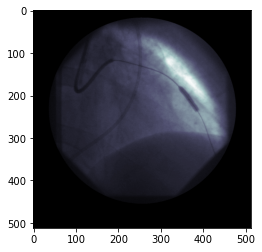

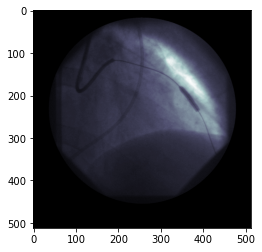

In [15]:
for i in range(dicom_file.pixel_array.shape[0]):
    dicom_img = dicom_file.pixel_array[i, :, :]
    plt.imshow(dicom_img, cmap=plt.cm.bone)
    plt.show()